# MNIST Classification

Classify handwritten digits from the famous MNIST dataset generated with the library MLDatasets, using NNJulia.

### Imports

In [1]:
# Import libraries
using MLDatasets
using Plots
#using Images

# NNJulia
using NNJulia

### Load dataset

In [2]:
####
# if this cell throws an error, copy these lines in
# julia REPL to download the data a first time, it will work here right after
####
# load full training set
train_x, train_y = MNIST.traindata();

# load full test set
test_x,  test_y  = MNIST.testdata();

In [3]:
# one-hot encoding of the labels
train_y_hot = to_one_hot(train_y)
test_y_hot = to_one_hot(test_y);

### Create the model 

In [4]:
model = Sequential(
        Flatten(),
        Dense(784, 16, relu),
        Dense(16, 16, relu),
        Dense(16, 10, softmax),
    )

Sequential with : 4 layer


Flatten layer.
Dense: 784 --> 16, Activation = relu
Dense: 16 --> 16, Activation = relu
Dense: 16 --> 10, Activation = softmax


### Train the model

Initialise the parameters used for the training phase :

In [5]:
# Initialise the optimiser, the loss function and the metrics used to compute accuracy
opt = GradientDescent(0.05)
loss = BinaryCrossentropy() # My Implementation of BinaryCrossentropy can also be used for categorical classification
metrics = CategoricalAccuracy()

# Pass it to the TrainParameters struct that will be used during training
trainParams = TrainParameters(opt, loss, metrics)

# Training specifications
batchsize = 64
nbEpochs = 25;

Load the train data into a dataloader that will split the data into shuffled batches :

In [6]:
trainData = DataLoader(train_x, train_y_hot, batchsize,true);

Train the model :

In [7]:
# The prints does not work during training in the notebook. (use the .jl version to see the lines printed during trianing )
history = train!(model, trainParams, trainData, nbEpochs,true)

Epoch 1 : accuracy = 0.298773987206823, loss = 318.62495114276504
Epoch 2 : accuracy = 0.45414112473347545, loss = 223.00169277200783
Epoch 3 : accuracy = 0.5243203624733476, loss = 199.61813148162474
Epoch 4 : accuracy = 0.5712286780383795, loss = 183.04042494577646
Epoch 5 : accuracy = 0.6072261460554371, loss = 169.4360561785598
Epoch 6 : accuracy = 0.6364438965884861, loss = 158.09193581234499
Epoch 7 : accuracy = 0.6636793710021321, loss = 148.8467543950554
Epoch 8 : accuracy = 0.6840351812366737, loss = 141.09590290253666
Epoch 9 : accuracy = 0.7023587420042644, loss = 134.6329361055054
Epoch 10 : accuracy = 0.7159848081023454, loss = 129.16287963925885
Epoch 11 : accuracy = 0.730543710021322, loss = 124.18415010694102
Epoch 12 : accuracy = 0.7430037313432836, loss = 119.74274556116413
Epoch 13 : accuracy = 0.7529817430703625, loss = 115.59783245528408
Epoch 14 : accuracy = 0.7620435767590619, loss = 111.95931864340714
Epoch 15 : accuracy = 0.7702392057569296, loss = 108.64450256

Dict{String, Vector{Float64}} with 2 entries:
  "accuracy" => [0.298774, 0.454141, 0.52432, 0.571229, 0.607226, 0.636444, 0.6…
  "loss"     => [318.625, 223.002, 199.618, 183.04, 169.436, 158.092, 148.847, …

### Plot accuracy and loss

Plot the evolution of the accuracy and the loss during the training phase:

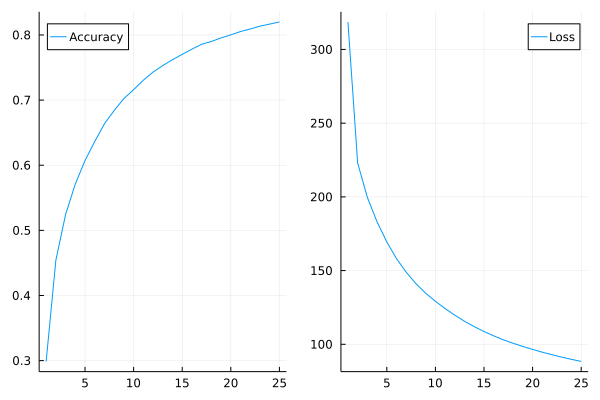

In [8]:
p1 = plot(history["accuracy"],label="Accuracy",legend=:topleft)
p2 = plot(history["loss"],label="Loss")
plot(p1,p2,layout=2)

### Evaluate the model

In [9]:
acc = evaluate(model,metrics,test_x,test_y_hot)
println("accuracy on test data = " * string(acc*100) * "%")

accuracy on test data = 82.35%


Predict a random example from the test set :

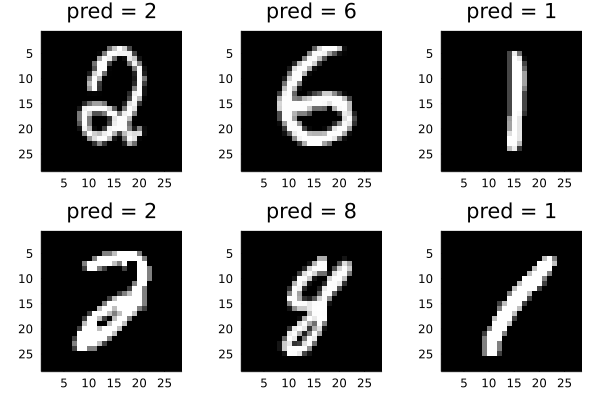

In [16]:
plots = []
for i in 1:6
    r = rand(1:10000)
    img = (Gray.(permutedims(test_x[:,:,r])))
    preds = model(reshape(test_x[:,:,r],:,1));
    predicted_label = argmax(preds.data)[1]-1
    push!(plots,plot(img,title="pred = " * string(predicted_label)))
end

plot(plots...,layout=6)